In [18]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from exchanges import CoinDesk as C

In [25]:
def getData(dynamic = True):
    if dynamic: 
        '''dyamic data - latest prices'''
        data = C.get_historical_data_as_dict()
        df = pd.DataFrame(data = [float(d) for d in data.values()],
                     index = pd.to_datetime(list(data.keys())), 
                     columns = ['Close'])
        #append the most current price
        df = df.append(pd.DataFrame([float(C.get_current_price())],
                       columns=['Close'], 
                      index = [pd.to_datetime('today')])
         )
#         df = df.sort_index(ascending=False)
    
    else: 
        'static, if for some reason Exchange does not return data'
        df = pd.read_csv('bitcoin.csv', encoding = "ISO-8859-1")
        indices = []
        for i, e in enumerate(df.Close): 
            try: 
                df.Close.iloc[i] = float(df.Close.iloc[i])
            except Exception as ex: 
                indices.append(i)

        df = df.drop(indices, axis=0)
        df.index = pd.to_datetime(df.Date)
        
    return df.sort_index(ascending=True)

In [26]:
def peek(data, start = 0, end = -1):
    temp = data[start:end]
    
    plt.figure(figsize = (15, 10))
    plt.gcf().autofmt_xdate()
    
    plt.subplot(2, 1, 1)
    temp.Close.plot(logy=True, grid=True)

    plt.subplot(2, 1, 2)
    temp.Close.plot(grid=True,
                    yticks=np.linspace(0, np.ceil(temp.Close.max() / 1000) * 1000, 5, dtype=int), 
                   )
    plt.show()


In [27]:
df = getData()
df.tail()


,Close
2018-01-29,11158.3938
2018-01-30,10034.9975
2018-01-31,10166.5063
2018-02-01,9052.5763
2018-02-02,8073.3500


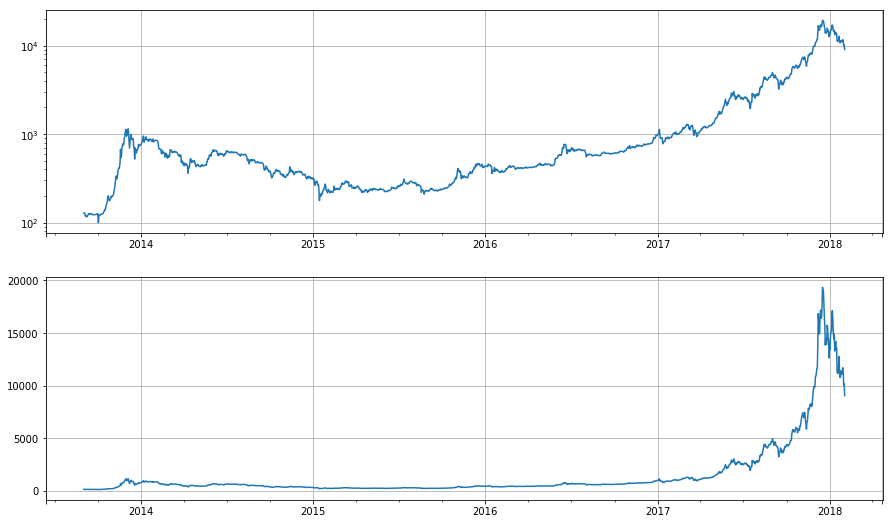

In [28]:
peek(df)